In [1]:
import time
import random
import matplotlib.pyplot as plt
import pandas as pd
from naive_orderbook import NaiveOrderBook

# Set random seed for reproducibility
random.seed(42)


## Benchmark Functions


In [2]:
def benchmark_insert(num_operations):
    """
    Benchmark insert operations.
    
    Args:
        num_operations: Number of insert operations to perform
        
    Returns:
        tuple: (total_time, avg_time_per_op)
    """
    ob = NaiveOrderBook()
    
    # Generate random orders
    orders = []
    for i in range(num_operations):
        side = random.choice(["bid", "ask"])
        price = round(random.uniform(90.0, 110.0), 2)
        quantity = random.randint(1, 100)
        orders.append({
            "order_id": i,
            "price": price,
            "quantity": quantity,
            "side": side
        })
    
    # Benchmark insertions
    start_time = time.perf_counter()
    for order in orders:
        ob.add_order(order)
    end_time = time.perf_counter()
    
    total_time = end_time - start_time
    avg_time = total_time / num_operations
    
    return total_time, avg_time


In [3]:
def benchmark_amend(num_operations):
    """
    Benchmark amend operations.
    
    Args:
        num_operations: Number of amend operations to perform
        
    Returns:
        tuple: (total_time, avg_time_per_op)
    """
    ob = NaiveOrderBook()
    
    # First, populate the order book with orders
    num_initial_orders = max(num_operations, 1000)  # Ensure we have enough orders
    order_ids = []
    for i in range(num_initial_orders):
        side = random.choice(["bid", "ask"])
        price = round(random.uniform(90.0, 110.0), 2)
        quantity = random.randint(1, 100)
        order_id = i
        order_ids.append(order_id)
        ob.add_order({
            "order_id": order_id,
            "price": price,
            "quantity": quantity,
            "side": side
        })
    
    # Generate random amend operations
    amend_operations = []
    for _ in range(num_operations):
        order_id = random.choice(order_ids)
        new_quantity = random.randint(1, 100)
        amend_operations.append((order_id, new_quantity))
    
    # Benchmark amendments
    start_time = time.perf_counter()
    for order_id, new_quantity in amend_operations:
        ob.amend_order(order_id, new_quantity)
    end_time = time.perf_counter()
    
    total_time = end_time - start_time
    avg_time = total_time / num_operations
    
    return total_time, avg_time


In [4]:
def benchmark_delete(num_operations):
    """
    Benchmark delete operations.
    
    Args:
        num_operations: Number of delete operations to perform
        
    Returns:
        tuple: (total_time, avg_time_per_op)
    """
    ob = NaiveOrderBook()
    
    # First, populate the order book with orders
    num_initial_orders = max(num_operations, 1000)  # Ensure we have enough orders
    order_ids = []
    for i in range(num_initial_orders):
        side = random.choice(["bid", "ask"])
        price = round(random.uniform(90.0, 110.0), 2)
        quantity = random.randint(1, 100)
        order_id = i
        order_ids.append(order_id)
        ob.add_order({
            "order_id": order_id,
            "price": price,
            "quantity": quantity,
            "side": side
        })
    
    # Generate random delete operations (shuffle to avoid always deleting from start)
    delete_operations = random.sample(order_ids, min(num_operations, len(order_ids)))
    
    # Benchmark deletions
    start_time = time.perf_counter()
    for order_id in delete_operations:
        ob.delete_order(order_id)
    end_time = time.perf_counter()
    
    total_time = end_time - start_time
    avg_time = total_time / num_operations
    
    return total_time, avg_time


## Run Benchmarks


In [5]:
# Workload sizes to test
workload_sizes = [10, 100, 1000, 10000, 100000, 1000000]

# Storage for results
results = {
    "insert": {"sizes": [], "total_times": [], "avg_times": []},
    "amend": {"sizes": [], "total_times": [], "avg_times": []},
    "delete": {"sizes": [], "total_times": [], "avg_times": []}
}

print("Starting benchmarks...")
print("=" * 80)


Starting benchmarks...


In [6]:
# Benchmark Insert Operations
print("\nBenchmarking INSERT operations:")
print("-" * 80)
for size in workload_sizes:
    print(f"Running {size:,} insertions...", end=" ", flush=True)
    total_time, avg_time = benchmark_insert(size)
    results["insert"]["sizes"].append(size)
    results["insert"]["total_times"].append(total_time)
    results["insert"]["avg_times"].append(avg_time)
    print(f"Total: {total_time:.6f}s, Avg: {avg_time*1000:.6f}ms")
print("Insert benchmarks complete!")



Benchmarking INSERT operations:
--------------------------------------------------------------------------------
Running 10 insertions... Total: 0.000010s, Avg: 0.000960ms
Running 100 insertions... Total: 0.000127s, Avg: 0.001271ms
Running 1,000 insertions... Total: 0.008354s, Avg: 0.008354ms
Running 10,000 insertions... Total: 0.949245s, Avg: 0.094924ms
Running 100,000 insertions... Total: 235.860959s, Avg: 2.358610ms
Running 1,000,000 insertions... 

KeyboardInterrupt: 

In [ ]:
print(results)

{'insert': {'sizes': [10, 100, 1000, 10000, 100000], 'total_times': [9.60000033956021e-06, 0.00012710000737570226, 0.00835400000505615, 0.9492446000076598, 235.86095940000087], 'avg_times': [9.60000033956021e-07, 1.2710000737570227e-06, 8.35400000505615e-06, 9.492446000076598e-05, 0.0023586095940000087]}, 'amend': {'sizes': [], 'total_times': [], 'avg_times': []}, 'delete': {'sizes': [], 'total_times': [], 'avg_times': []}}


In [8]:
# Benchmark Amend Operations
print("\nBenchmarking AMEND operations:")
print("-" * 80)
for size in workload_sizes:
    print(f"Running {size:,} amendments...", end=" ", flush=True)
    total_time, avg_time = benchmark_amend(size)
    results["amend"]["sizes"].append(size)
    results["amend"]["total_times"].append(total_time)
    results["amend"]["avg_times"].append(avg_time)
    print(f"Total: {total_time:.6f}s, Avg: {avg_time*1000:.6f}ms")
print("Amend benchmarks complete!")



Benchmarking AMEND operations:
--------------------------------------------------------------------------------
Running 10 amendments... Total: 0.000249s, Avg: 0.024890ms
Running 100 amendments... Total: 0.002621s, Avg: 0.026211ms
Running 1,000 amendments... Total: 0.026075s, Avg: 0.026075ms
Running 10,000 amendments... Total: 3.428419s, Avg: 0.342842ms
Running 100,000 amendments... Total: 2206.520497s, Avg: 22.065205ms
Running 1,000,000 amendments... 

KeyboardInterrupt: 

In [9]:
# Benchmark Delete Operations
print("\nBenchmarking DELETE operations:")
print("-" * 80)
for size in workload_sizes:
    print(f"Running {size:,} deletions...", end=" ", flush=True)
    total_time, avg_time = benchmark_delete(size)
    results["delete"]["sizes"].append(size)
    results["delete"]["total_times"].append(total_time)
    results["delete"]["avg_times"].append(avg_time)
    print(f"Total: {total_time:.6f}s, Avg: {avg_time*1000:.6f}ms")
print("Delete benchmarks complete!")
print("\n" + "=" * 80)
print("All benchmarks complete!")



Benchmarking DELETE operations:
--------------------------------------------------------------------------------
Running 10 deletions... Total: 0.000358s, Avg: 0.035750ms
Running 100 deletions... Total: 0.002947s, Avg: 0.029467ms
Running 1,000 deletions... Total: 0.015914s, Avg: 0.015914ms
Running 10,000 deletions... Total: 1.847206s, Avg: 0.184721ms
Running 100,000 deletions... Total: 818.670342s, Avg: 8.186703ms
Running 1,000,000 deletions... 

KeyboardInterrupt: 

## Results Summary


In [10]:
# Create DataFrames for each operation type
df_insert = pd.DataFrame({
    "Operations": results["insert"]["sizes"],
    "Total Time (s)": results["insert"]["total_times"],
    "Avg Time per Op (ms)": [t * 1000 for t in results["insert"]["avg_times"]]
})

df_amend = pd.DataFrame({
    "Operations": results["amend"]["sizes"],
    "Total Time (s)": results["amend"]["total_times"],
    "Avg Time per Op (ms)": [t * 1000 for t in results["amend"]["avg_times"]]
})

df_delete = pd.DataFrame({
    "Operations": results["delete"]["sizes"],
    "Total Time (s)": results["delete"]["total_times"],
    "Avg Time per Op (ms)": [t * 1000 for t in results["delete"]["avg_times"]]
})

print("INSERT Operations:")
print(df_insert.to_string(index=False))
print("\n" + "=" * 80)
print("\nAMEND Operations:")
print(df_amend.to_string(index=False))
print("\n" + "=" * 80)
print("\nDELETE Operations:")
print(df_delete.to_string(index=False))


INSERT Operations:
 Operations  Total Time (s)  Avg Time per Op (ms)
         10        0.000010              0.000960
        100        0.000127              0.001271
       1000        0.008354              0.008354
      10000        0.949245              0.094924
     100000      235.860959              2.358610


AMEND Operations:
 Operations  Total Time (s)  Avg Time per Op (ms)
         10        0.000249              0.024890
        100        0.002621              0.026211
       1000        0.026075              0.026075
      10000        3.428419              0.342842
     100000     2206.520497             22.065205


DELETE Operations:
 Operations  Total Time (s)  Avg Time per Op (ms)
         10        0.000358              0.035750
        100        0.002947              0.029467
       1000        0.015914              0.015914
      10000        1.847206              0.184721
     100000      818.670342              8.186703


## Visualization: Total Time vs Number of Operations


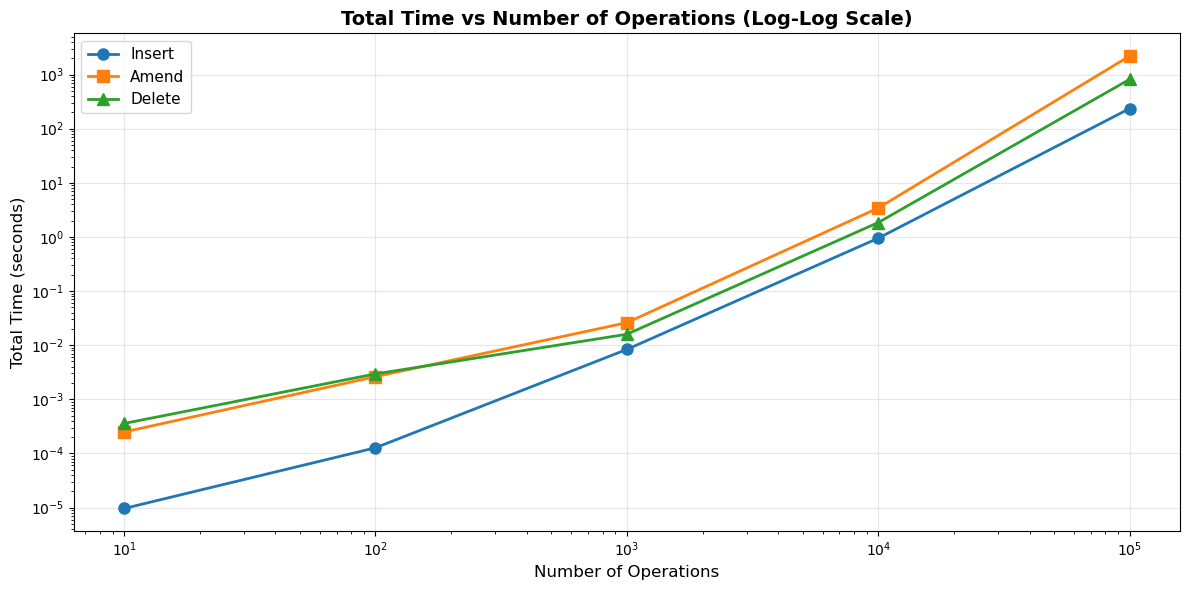

In [12]:
plt.figure(figsize=(12, 6))
plt.loglog(results["insert"]["sizes"], results["insert"]["total_times"], 
           marker='o', label='Insert', linewidth=2, markersize=8)
plt.loglog(results["amend"]["sizes"], results["amend"]["total_times"], 
           marker='s', label='Amend', linewidth=2, markersize=8)
plt.loglog(results["delete"]["sizes"], results["delete"]["total_times"], 
           marker='^', label='Delete', linewidth=2, markersize=8)

plt.xlabel('Number of Operations', fontsize=12)
plt.ylabel('Total Time (seconds)', fontsize=12)
plt.title('Total Time vs Number of Operations (Log-Log Scale)', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('naive_total_time.png', dpi=300, bbox_inches='tight')
plt.show()


## Visualization: Average Time per Operation vs Number of Operations


In [ ]:
plt.figure(figsize=(12, 6))
plt.loglog(results["insert"]["sizes"], [t * 1000 for t in results["insert"]["avg_times"]], 
           marker='o', label='Insert', linewidth=2, markersize=8)
plt.loglog(results["amend"]["sizes"], [t * 1000 for t in results["amend"]["avg_times"]], 
           marker='s', label='Amend', linewidth=2, markersize=8)
plt.loglog(results["delete"]["sizes"], [t * 1000 for t in results["delete"]["avg_times"]], 
           marker='^', label='Delete', linewidth=2, markersize=8)

plt.xlabel('Number of Operations', fontsize=12)
plt.ylabel('Average Time per Operation (milliseconds)', fontsize=12)
plt.title('Average Time per Operation vs Number of Operations (Log-Log Scale)', 
          fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('naive_avg_time.png', dpi=300, bbox_inches='tight')
plt.show()


## Scaling Analysis


In [13]:
# Calculate scaling factors (how much slower when operations increase 10x)
def calculate_scaling(results_dict):
    """Calculate how performance scales with workload size."""
    scaling = []
    sizes = results_dict["sizes"]
    total_times = results_dict["total_times"]
    
    for i in range(1, len(sizes)):
        size_ratio = sizes[i] / sizes[i-1]
        time_ratio = total_times[i] / total_times[i-1]
        scaling_factor = time_ratio / size_ratio  # Should be ~1 for linear, >1 for worse
        scaling.append({
            "From": sizes[i-1],
            "To": sizes[i],
            "Size Increase": f"{size_ratio:.1f}x",
            "Time Increase": f"{time_ratio:.2f}x",
            "Scaling Factor": f"{scaling_factor:.2f}x"
        })
    
    return pd.DataFrame(scaling)

print("INSERT Scaling Analysis:")
print(calculate_scaling(results["insert"]))
print("\n" + "=" * 80)
print("\nAMEND Scaling Analysis:")
print(calculate_scaling(results["amend"]))
print("\n" + "=" * 80)
print("\nDELETE Scaling Analysis:")
print(calculate_scaling(results["delete"]))


INSERT Scaling Analysis:
    From      To Size Increase Time Increase Scaling Factor
0     10     100         10.0x        13.24x          1.32x
1    100    1000         10.0x        65.73x          6.57x
2   1000   10000         10.0x       113.63x         11.36x
3  10000  100000         10.0x       248.47x         24.85x


AMEND Scaling Analysis:
    From      To Size Increase Time Increase Scaling Factor
0     10     100         10.0x        10.53x          1.05x
1    100    1000         10.0x         9.95x          0.99x
2   1000   10000         10.0x       131.48x         13.15x
3  10000  100000         10.0x       643.60x         64.36x


DELETE Scaling Analysis:
    From      To Size Increase Time Increase Scaling Factor
0     10     100         10.0x         8.24x          0.82x
1    100    1000         10.0x         5.40x          0.54x
2   1000   10000         10.0x       116.07x         11.61x
3  10000  100000         10.0x       443.19x         44.32x
